<a href="https://colab.research.google.com/github/riyagpt0251/DeepFoundation/blob/main/DeepFoundationLoadCapacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 16798.8289
R-squared Score: 0.7404


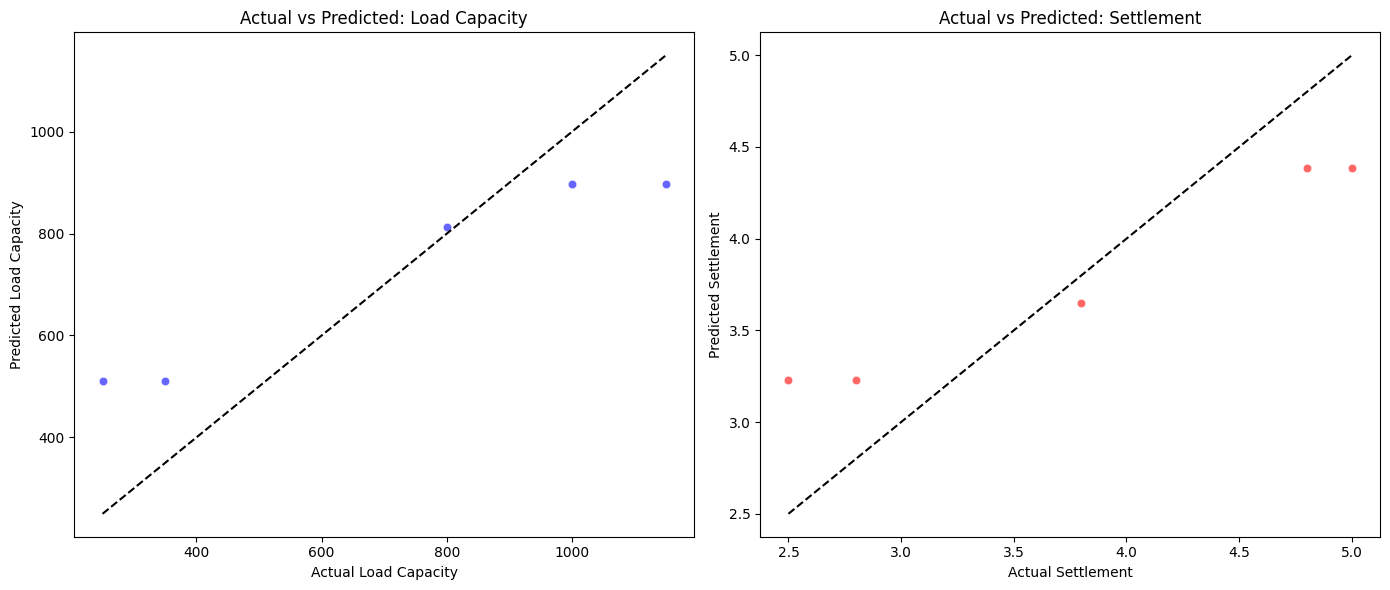


Confusion Matrix (Discretized Load Capacity):
[[0 2 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]
Model saved as 'best_model.pkl'.


In [21]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

# Load dataset
data = pd.read_csv('Data.csv')

# Separate features and targets
X = data.drop(columns=['load_capacity', 'settlement'])  # Features
y = data[['load_capacity', 'settlement']]  # Targets

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Define hyperparameter grid
param_grid = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}

# Train the model
model = GridSearchCV(RandomForestRegressor(), param_grid, cv=4, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

# Get the best model
best_model = model.best_estimator_

# Make predictions
predictions = best_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

# --- Wide-Range Visualization: Actual vs Predicted ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Load Capacity Scatter Plot
sns.scatterplot(x=y_test['load_capacity'], y=predictions[:, 0], ax=axes[0], color="blue", alpha=0.6)
sns.lineplot(x=y_test['load_capacity'], y=y_test['load_capacity'], ax=axes[0], color="black", linestyle="dashed")  # Ideal 1:1 line
axes[0].set_title("Actual vs Predicted: Load Capacity")
axes[0].set_xlabel("Actual Load Capacity")
axes[0].set_ylabel("Predicted Load Capacity")

# Settlement Scatter Plot
sns.scatterplot(x=y_test['settlement'], y=predictions[:, 1], ax=axes[1], color="red", alpha=0.6)
sns.lineplot(x=y_test['settlement'], y=y_test['settlement'], ax=axes[1], color="black", linestyle="dashed")  # Ideal 1:1 line
axes[1].set_title("Actual vs Predicted: Settlement")
axes[1].set_xlabel("Actual Settlement")
axes[1].set_ylabel("Predicted Settlement")

plt.tight_layout()
plt.show()

# --- Confusion Matrix (Printed as a Table) ---
# Convert regression values into bins (Low, Medium, High)
num_bins = 5  # Adjust for granularity
bins = np.histogram_bin_edges(y_test['load_capacity'], bins=num_bins)  # Get bin edges
y_test_class = np.digitize(y_test['load_capacity'], bins=bins)
pred_class = np.digitize(predictions[:, 0], bins=bins)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_class, pred_class)

print("\nConfusion Matrix (Discretized Load Capacity):")
print(conf_matrix)

# --- Save the trained model ---
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved as 'best_model.pkl'.")
